In [4]:
import matplotlib.pyplot as plt
import numpy as np


In [53]:
%%bash
mpicc demo_util.c hw3p2_sage.c -o hw3p2_sage -lm
mpirun -n 4 ./hw3p2_sage -p 5 --itermax 100000 --tol 1.0e-10 > results_sage_GS.csv

iterations: 25586
residual: 9.99649e-11
nodes: 130
error: 0.000395208


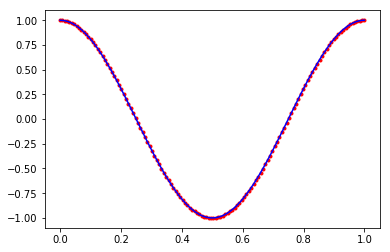

In [54]:
A = np.genfromtxt('results_sage_GS.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [14]:
A = np.arange(6**2).reshape((6,6))
A = np.array([[100*x+y for x in range(6)] for y in range(6)])

In [7]:
%%bash
mpicc demo_util.c hw3p2_node.c -o hw3p2_node -lm
mpirun -n 4 ./hw3p2_node -p 5 --itermax 100000 --tol 1.0e-10 > results_node_GS.csv

iterations: 24852
residual: 9.99731e-11
nodes: 128
error: 0.000407764


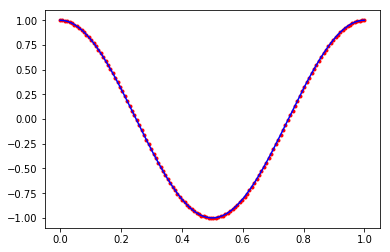

In [8]:
A = np.genfromtxt('results_node_GS.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [12]:
%%bash
mpicc demo_util.c hw3p2_cell.c -o hw3p2_cell -lm
mpirun -n 4 ./hw3p2_cell -p 5 --itermax 100000 --tol 1.0e-10 > results_cell_GS.csv

iterations: 25217
residual: 9.99519e-11
cells: 128
error: 0.000301183


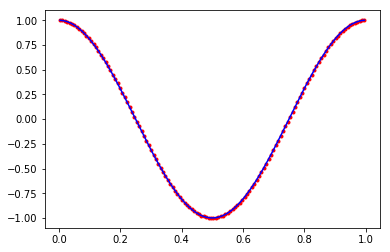

In [14]:
A = np.genfromtxt('results_cell_GS.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')